# Final Assignment - Part 2

### Assignment Instructions

#### Part 2   |   Advanced Difficulty Level

In this second part, you will be working with a datasets containing information on indian startups' funding, including the startup's details, the funding it received, and the investors' information. 

In the usual `data` folder, you will find the following three datasets, including data from 2019, 2020 and 2021: 

- `startup_funding2019.csv`
- `startup_funding2020.csv`
- `startup_funding2021.csv`

At [this link](https://www.kaggle.com/datasets/omkargowda/indian-startups-funding-data?select=startup_funding2019.csv) you can find the source of the original data (Kaggle) as well as more information on its composition *(note: the files in the data folder are slightly different from the originals)*.

1. Using a **for loop**, load all three .csv files in a temporary DataFrame called `df_tmp` and, at each cycle, add a new column named `Year` that includes the year of that csv file to the temporary table and append it to a final DataFrame named `fnd`. Your final `fnd` DataFrame should include the contents from all three csv files stacked one on top of the other. 

    What is the **shape** of the `fnd` DataFrame? 

In [27]:
import pandas as pd
fnd = pd.DataFrame()
for i in [2019, 2020, 2021]:
	df_temp = pd.read_csv("./data/startup_funding" + str(i) + ".csv")
	df_temp["Year"] = i
	print(df_temp.shape, i)
	fnd = pd.concat([fnd, df_temp])

print(fnd.shape)

(89, 10) 2019
(1052, 10) 2020
(1202, 10) 2021
(2343, 10)


2. If you check the columns' data types, you'll notice that the columns `Founded`, `Amount($)` and `Year` are being interpreted as strings instead of numbers. Format those three columns to numeric data types. 

    What is the **total** `Amount($)` of funding given in the three years available?

In [28]:
import numpy as np
# fnd["Founded"] = fnd["Founded"]

fnd["Founded"] = pd.to_numeric(fnd["Founded"], errors="coerce")

fnd["Amount($)"] = fnd["Amount($)"].str.replace("$", "").replace(",", "")
fnd["Amount($)"] = pd.to_numeric(fnd["Amount($)"], errors="coerce")

In [32]:
funding_by_year = fnd[["Year", "Amount($)"]].groupby(by="Year").sum()
print(funding_by_year)

         Amount($)
Year              
2019  0.000000e+00
2020  0.000000e+00
2021  1.758504e+10


3. The following code shows us that "Inflection Point Ventures" was the `Investor` that funded the highest number of `Company/Brand`s overall (36 companies funded from 2019 to 2021). 

    How did "Inflection Point Ventures" **rank** *(in terms of most `Company/Brand`s funded) **in 2020**? (Note: in the answer write the rank number, where 1 = most funded company)*

In [33]:
# run this cell (don not delete it)
fnd.groupby('Investor', as_index=False).size().sort_values('size', ascending=False).head(1)

,Investor,size
696,Inflection Point Ventures,36


In [40]:
# filter for year
investors_2020 = fnd[fnd["Year"] == 2020].groupby('Investor', as_index=False).size().sort_values('size', ascending=False)
print(investors_2020[investors_2020["Investor"] == "Inflection Point Ventures"])

                      Investor  size
334  Inflection Point Ventures    11


4. Load the `Software Professionals Salary.csv` file in a DataFrame named `sps` (just like you did in Part 1), then perform the following tasks **and answer the question at the end**: 
    1. starting from the `sps` DataFrame, create a new DF called `sps_loc` where you group by `Location` and show, for each city in the dataset, the average `Rating` and `Salary`;
    2. starting from the `fnd` DataFrame, create a new DF called `fnd_loc` where you group by `HeadQuarter` and show, for each city in the dataset **for the year 2021**, the total number of `Company/Brand`s funded and the total `Amount($)` invested;
    3. merge the two DataFrames you just created so to **keep just the cities that are in both datasets** and save the results in a third DataFrame called `sps_fnd_loc` *(note: make sure to use the correct type of join)*;
    4. using the `sps_fnd_loc` DataFrame: 
        1. delete the `HeadQuarter` column
        2. create a new column `Amount($MM)` that is equal to `Amount($)` divided by 1,000,000
        3. delete the `Amount($)` column
        4. rename all the columns to the following names: `['City', 'Avg. Rating', 'Avg. Salary', 'Nr. Companies Funded', 'Sum Funding ($MM)']`
    
    **Question**: Look at the `City` that received the **highest** `Avg. Rating` score by employees: what is the `Nr. Companies Funded` in that city? 

In [41]:
sps = pd.read_csv("./data/Software Professionals Salary.csv")

In [64]:
sps_loc = sps[["Location", "Rating", "Salary"]].groupby(by="Location", as_index=False).mean()
print(sps_loc)

         Location    Rating         Salary
0       Bangalore  3.920232  735344.739593
1         Chennai  3.902726  584559.661513
2       Hyderabad  3.914484  679099.157376
3          Jaipur  3.940741  629135.802469
4          Kerala  3.885185  553577.481481
5         Kolkata  4.024719  710925.573034
6  Madhya Pradesh  3.992258  677641.909677
7          Mumbai  3.881709  961180.368491
8       New Delhi  3.943415  658756.735632
9            Pune  3.886082  690476.311153


In [63]:
fnd_loc = fnd[fnd["Year"] == 2021][["HeadQuarter", "Company/Brand", "Amount($)"]].groupby(by="HeadQuarter", as_index=False).agg({ "Company/Brand": "count", "Amount($)": "sum" })
print(fnd_loc.head())

  HeadQuarter  Company/Brand     Amount($)
0   Ahmadabad              6  1.300000e+06
1   Ahmedabad             11  1.975000e+08
2   Ambernath              1  0.000000e+00
3     Andheri              1  0.000000e+00
4   Bangalore            425  8.615095e+09


In [85]:
sps_fnd_loc = pd.merge(left=sps_loc, right=fnd_loc, how="inner", left_on="Location", right_on="HeadQuarter")
sps_fnd_loc

,Location,Rating,Salary,HeadQuarter,Company/Brand,Amount($)
0,Bangalore,3.920232,735344.739593,Bangalore,425,8.615095e+09
1,Chennai,3.902726,584559.661513,Chennai,40,3.528000e+08
2,Hyderabad,3.914484,679099.157376,Hyderabad,34,2.162600e+08
3,Jaipur,3.940741,629135.802469,Jaipur,11,3.155000e+08
4,Kolkata,4.024719,710925.573034,Kolkata,5,2.800000e+07
5,Mumbai,3.881709,961180.368491,Mumbai,200,2.287580e+09
6,New Delhi,3.943415,658756.735632,New Delhi,143,9.998500e+08
7,Pune,3.886082,690476.311153,Pune,46,4.162200e+08


In [86]:
sps_fnd_loc.drop(columns="HeadQuarter", inplace=True)
sps_fnd_loc["Amount($MM)"] = sps_fnd_loc["Amount($)"] / 1_000_000
sps_fnd_loc.drop(columns="Amount($)", inplace=True)
sps_fnd_loc

,Location,Rating,Salary,Company/Brand,Amount($MM)
0,Bangalore,3.920232,735344.739593,425,8615.095
1,Chennai,3.902726,584559.661513,40,352.800
2,Hyderabad,3.914484,679099.157376,34,216.260
3,Jaipur,3.940741,629135.802469,11,315.500
4,Kolkata,4.024719,710925.573034,5,28.000
5,Mumbai,3.881709,961180.368491,200,2287.580
6,New Delhi,3.943415,658756.735632,143,999.850
7,Pune,3.886082,690476.311153,46,416.220


In [87]:
sps_fnd_loc.columns = ['City', 'Avg. Rating', 'Avg. Salary', 'Nr. Companies Funded', 'Sum Funding ($MM)']
sps_fnd_loc

,City,Avg. Rating,Avg. Salary,Nr. Companies Funded,Sum Funding ($MM)
0,Bangalore,3.920232,735344.739593,425,8615.095
1,Chennai,3.902726,584559.661513,40,352.800
2,Hyderabad,3.914484,679099.157376,34,216.260
3,Jaipur,3.940741,629135.802469,11,315.500
4,Kolkata,4.024719,710925.573034,5,28.000
5,Mumbai,3.881709,961180.368491,200,2287.580
6,New Delhi,3.943415,658756.735632,143,999.850
7,Pune,3.886082,690476.311153,46,416.220


In [88]:
sps_fnd_loc.sort_values(by="Avg. Rating", ascending=False).head(1)

,City,Avg. Rating,Avg. Salary,Nr. Companies Funded,Sum Funding ($MM)
4,Kolkata,4.024719,710925.573034,5,28.0


5. Create a scatterplot that shows the relationship between the `Avg. Salary` and the `Sum Funding ($MM)`. Which `City` stands out in terms of total funding received by companies and salary paid to their employees? 

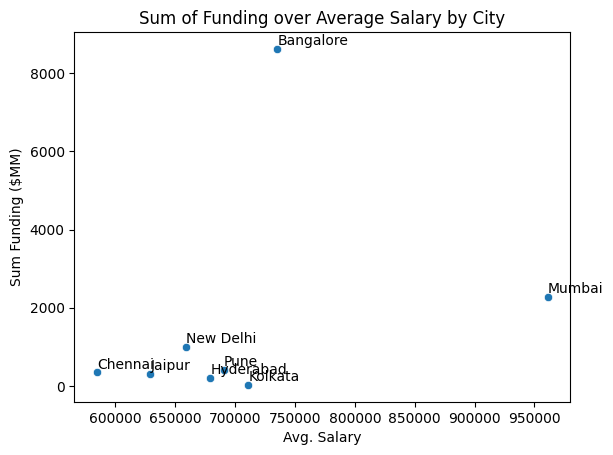

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
plot = sns.scatterplot(data=sps_fnd_loc, x="Avg. Salary", y="Sum Funding ($MM)")
plot.set_title("Sum of Funding over Average Salary by City")

for index, vals in enumerate(zip(sps_fnd_loc["City"], sps_fnd_loc["Avg. Salary"], sps_fnd_loc["Sum Funding ($MM)"])):
	city, salary, funding = vals
	plot.text(x=salary, y = funding+100, s=city)